In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
%matplotlib inline

In [149]:
lm=LinearRegression()

In [150]:
manila = pd.read_csv("./data/Manila.csv")
manila = manila.dropna()

In [156]:
manila2 = manila.copy()
manila2 = manila2.drop('Diesel', axis=1)
manila2['Date'] = pd.to_datetime(manila2['Date'])
manila2['Date']= manila2['Date'].map(dt.datetime.toordinal)

In [152]:
manila_x = manila2[['Date']]
manila_y = manila2['RON91']
lm.fit(manila_x,manila_y)
lm.score(manila_x,manila_y)

0.21048091613148945

In [153]:
manila3 = pd.DataFrame({'Date': ["2024-03-03", "2024-03-16", "2024-03-25"]})
manila4 = manila3.copy()
manila4['Date'] = pd.to_datetime(manila4['Date'])
manila4['Date']= manila4['Date'].map(dt.datetime.toordinal)
manila3['RON91'] = lm.predict(manila4[['Date']]).round(2)
manila3

,Date,RON91
0,2024-03-03,67.80
1,2024-03-16,68.04
2,2024-03-25,68.21


In [159]:
manila2 = manila.copy()
manila2 = manila2.drop('RON91', axis=1)
manila2['Date'] = pd.to_datetime(manila2['Date'])
manila2['Date']= manila2['Date'].map(dt.datetime.toordinal)
manila2 = manila2.iloc[1:]
manila2

,Date,Diesel
1,738840,62.75
2,738854,61.15
3,738861,60.85
4,738876,59.10
5,738882,60.80
6,738889,60.45
7,738901,61.45
8,738910,62.40
9,738917,63.70
10,738931,64.10


In [161]:
manila_x = manila2[['Date']]
manila_z = manila2['Diesel']
lm.fit(manila_x,manila_z)
lm.score(manila_x,manila_z)

0.33279372307423793

In [162]:
manila4 = manila3.copy()
manila4['Date'] = pd.to_datetime(manila4['Date'])
manila4['Date']= manila4['Date'].map(dt.datetime.toordinal)
manila3['Diesel'] = lm.predict(manila4[['Date']]).round(2)
manila3

,Date,RON91,Diesel
0,2024-03-03,67.80,63.42
1,2024-03-16,68.04,63.78
2,2024-03-25,68.21,64.03


In [164]:
frames = [manila, manila3]
result = pd.concat(frames)
result

,Date,RON91,Diesel
0,2023-11-03,67.40,66.85
1,2023-11-16,66.25,62.75
2,2023-11-30,65.50,61.15
3,2023-12-07,65.80,60.85
4,2023-12-22,64.20,59.10
5,2023-12-28,65.80,60.80
6,2024-01-04,65.70,60.45
7,2024-01-16,66.10,61.45
8,2024-01-25,67.40,62.40
9,2024-02-01,69.95,63.70


<Axes: xlabel='Date'>

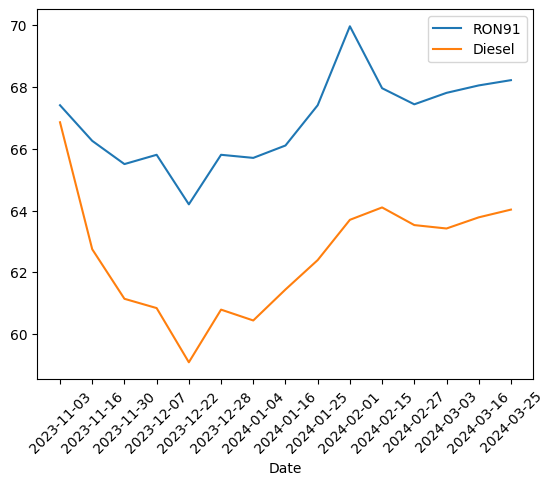

In [194]:
plt.xticks(rotation=45)
result.set_index(result["Date"],inplace=True)
sns.lineplot(data=result, dashes=False)